# This is Python code for K-Means clustering and geometric mean and standard deviation which is applied to Curry leaf dataset

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
#this dataset was obtained by measuring the length and width of each one of 100 Curry (Murraya koenigii) leaf manually (we call it Daun kari in Bahasa)

dataset= pd.read_csv('Murraya_koenigii_Salam Sakoja_Daun_Kari.csv', delimiter=';')
dataset

,daun,length (cm),width (cm),Area(cm^2)
0,1,3.8,1.6,6.08
1,2,4.3,1.8,7.74
2,3,3.5,1.7,5.95
3,4,3.7,1.6,5.92
4,5,3.6,1.7,6.12
...,...,...,...,...
95,96,3.0,1.6,4.80
96,97,4.0,1.7,6.80
97,98,2.9,1.8,5.22
98,99,2.5,1.6,4.00


You can check how the Curry leaf looks like on this website : https://gardenerspath.com/plants/herbs/grow-curry-leaf/

Text(0, 0.5, 'the area of each leaf')

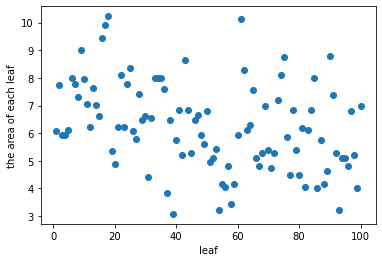

In [37]:
#let's observe the distribution of area of each Curry leaf by plotting them 

n=dataset['daun'].values #the total of the Murraya Koenigii leaf sample
Area=dataset['Area(cm^2)'].values

plt.scatter(n,Area)
plt.xlabel("leaf")
plt.ylabel("the area of each leaf")

In [38]:
X = dataset.iloc[:, [0, 3]].values

X #the area of each leaf that we want to cluster

array([[  1.   ,   6.08 ],
       [  2.   ,   7.74 ],
       [  3.   ,   5.95 ],
       [  4.   ,   5.92 ],
       [  5.   ,   6.12 ],
       [  6.   ,   7.98 ],
       [  7.   ,   7.79 ],
       [  8.   ,   7.31 ],
       [  9.   ,   9.   ],
       [ 10.   ,   7.961],
       [ 11.   ,   7.055],
       [ 12.   ,   6.24 ],
       [ 13.   ,   7.65 ],
       [ 14.   ,   7.03 ],
       [ 15.   ,   6.63 ],
       [ 16.   ,   9.45 ],
       [ 17.   ,   9.9  ],
       [ 18.   ,  10.23 ],
       [ 19.   ,   5.355],
       [ 20.   ,   4.9  ],
       [ 21.   ,   6.24 ],
       [ 22.   ,   8.1  ],
       [ 23.   ,   6.24 ],
       [ 24.   ,   7.79 ],
       [ 25.   ,   8.36 ],
       [ 26.   ,   6.08 ],
       [ 27.   ,   5.8  ],
       [ 28.   ,   7.41 ],
       [ 29.   ,   6.46 ],
       [ 30.   ,   6.63 ],
       [ 31.   ,   4.42 ],
       [ 32.   ,   6.56 ],
       [ 33.   ,   7.98 ],
       [ 34.   ,   7.98 ],
       [ 35.   ,   8.   ],
       [ 36.   ,   7.6  ],
       [ 37.   ,   3.84 ],
 

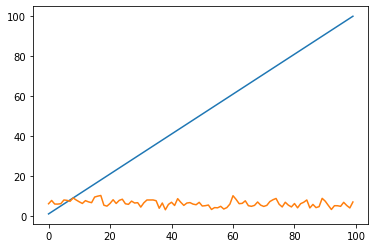

In [39]:
plt.plot(X)

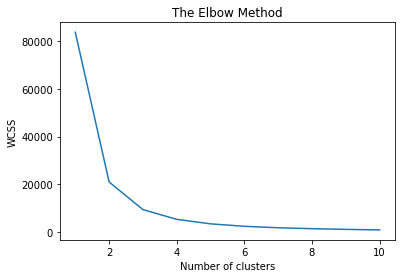

In [40]:

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Method is a wethod that we use to obtain the information in defining the number of cluster that is best for our cluster by observing the percentage of comparison among 10 cluster that will shape an elbow at one point

In [41]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42) #elbow point at point 3, as you can see on the plot
y_kmeans = kmeans.fit_predict(X)

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

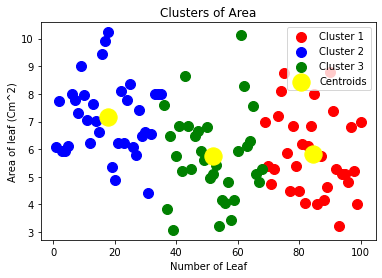

In [42]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Area')
plt.xlabel('Number of Leaf')
plt.ylabel('Area of leaf (Cm^2)')
plt.legend()
plt.show()

In [43]:
import scipy as sp

Area= dataset.iloc[:,3]

lognormal = sp.stats.gstd(Area, axis=0, ddof=1)

The geometric standard deviation describes the spread of a set of numbers where the geometric mean is preferred. It is a multiplicative factor, and so a dimensionless quantity.

It is defined as the exponent of the standard deviation of log(a). Mathematically the population geometric standard deviation can be evaluated as:

In [44]:
print(lognormal)

1.3019064723496716


In [45]:
gstd = np.exp(np.std(np.log(Area)))

In [47]:
print(gstd) #geometric standard deviation

1.3001858871646557
